Pedro Henrique Afonso

Getting Data -
Extracting the datasheet from the Raw GitHub Repository given.

Url: https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
  urlcitrus = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
  dfCitrus = pd.read_csv(urlcitrus)

except:
  print('Oh no! Theres an error! Check the URL and try again!')

#Converting into NumPy array

data_citrus = np.array(dfCitrus)


1) Getting the dimensions from the NumPy array!

---



In [ ]:
print('The dimension from the Citrus.csv file is:', data_citrus.ndim, '- dimensional')

shpCitrus = np.array(data_citrus.shape) #Using NumPy array just to practice the use of it!

print('The size from the Citrus.csv file is:', shpCitrus[1], 'by', shpCitrus[0])

The dimension from the Citrus.csv file is: 2 - dimensional
The size from the Citrus.csv file is: 6 by 10000


2) Slicing one array in 2 other arrays

```
oranges
grapefruits
```
---



In [ ]:
#Slicing oranges weight (column 2) from row 0 to 4999
oranges = data_citrus[0:4999, [2,1]]

#Slicing grapefruits weight (column 2) from row 5000 to 9999
grapefruits = data_citrus[5000:, [2,1]]


3) Applying linear regression on the data to obtain the slope from the line

Equation used:
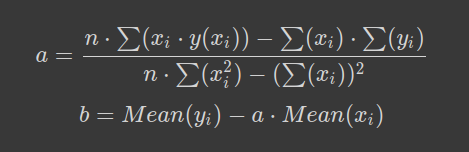
---



The coeficients a and b from the oranges are: [ 0.06752554 -1.84363276] with the equation: 0.06752554124957988 *x + ( -1.8436327596852058 )


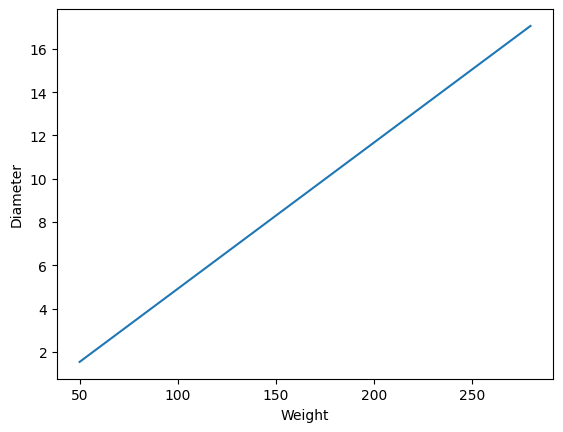

The coeficients a and b from the oranges are: [ 0.06358963 -1.06907531] with the equation: 0.06358962719436197 *x + ( -1.0690753104513162 )


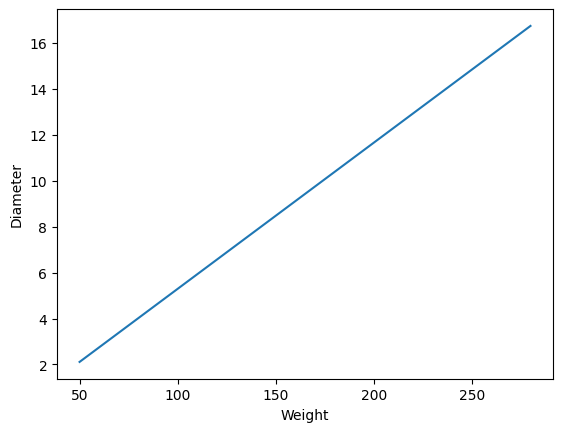

In [ ]:
class linCitrus:
  def __init__(self, weight, diameter):
    self.weight = weight
    self.diameter = diameter

    n = (self.weight).shape[0]

    a = ((n*np.sum(self.weight*self.diameter, axis=0)) - (np.sum(self.weight, axis=0)*np.sum(self.diameter, axis=0)))/((n*np.sum(self.weight*self.weight, axis=0)) - (np.sum(self.weight, axis=0)*np.sum(self.weight, axis=0)))
    self.a = a

    b = (np.sum(self.diameter, axis=0) - (self.a*np.sum(self.weight, axis=0)))/n
    self.b = b

  def get_array(self):
    return np.array([self.a, self.b])


arrCitrus = linCitrus(oranges[0:, 0], oranges[0:, 1])
orgsAB = arrCitrus.get_array()
print("The coeficients a and b from the oranges are:", orgsAB, "with the equation:", orgsAB[0],"*x +", "(",orgsAB[1],")")

# Plotting the oranges equation
x = np.linspace(50,280, 10000)

orgs_y = orgsAB[0]*x + orgsAB[1]

plt.plot(x, orgs_y, label='Orange Linearization')

plt.xlabel('Weight')
plt.ylabel('Diameter')
plt.show()

arrCitrus = linCitrus(grapefruits[0:, 0], grapefruits[0:, 1])
gpfsAB = arrCitrus.get_array()
print("The coeficients a and b from the oranges are:", gpfsAB, "with the equation:", gpfsAB[0],"*x +", "(",gpfsAB[1],")")

# Plotting the grapefruits equation
x = np.linspace(50,280, 10000)

gpfs_y = gpfsAB[0]*x + gpfsAB[1]

plt.plot(x, gpfs_y, label='Grapefruits Linearization')

plt.xlabel('Weight')
plt.ylabel('Diameter')
plt.show()